In [21]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/MachineLearning/praktikum09/"

In [39]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [24]:
# Membaca dataset titanic dari folder drive
df = pd.read_csv(path + "/data/data.csv")

# Melihat beberapa data teratas
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


membaca file CSV dari Google Drive dan menampilkan 5 baris pertama → mengecek struktur data.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

menampilkan tipe data tiap kolom dan jumlah non-null (cek missing value dan tipe numerik/kategorikal).

In [26]:
df.shape

(569, 33)

memberi info (jumlah baris, jumlah kolom).

In [27]:
print("Missing Value Tiap Kolom:")
print(df.isnull().sum())

if 'id' in df.columns:
    df = df.drop(columns=['id'])

if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

Missing Value Tiap Kolom:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimen

isnull().sum() → menghitung jumlah nilai kosong tiap kolom.

Pada dataset Breast Cancer biasanya ada kolom id dan Unnamed: 32 yang tidak berguna untuk klasifikasi → dihapus dengan drop().

In [28]:
print("Statistika Deskriptif:")
display(df.describe())

Statistika Deskriptif:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


describe() → ringkasan statistik (mean, std, min, max, kuartil) untuk fitur numerik.

In [29]:
print("Value Counts Target (diagnosis):")
print(df['diagnosis'].value_counts())

Value Counts Target (diagnosis):
diagnosis
B    357
M    212
Name: count, dtype: int64


value_counts() pada diagnosis → jumlah data kelas M (malignant/ganas) dan B (benign/jinak).

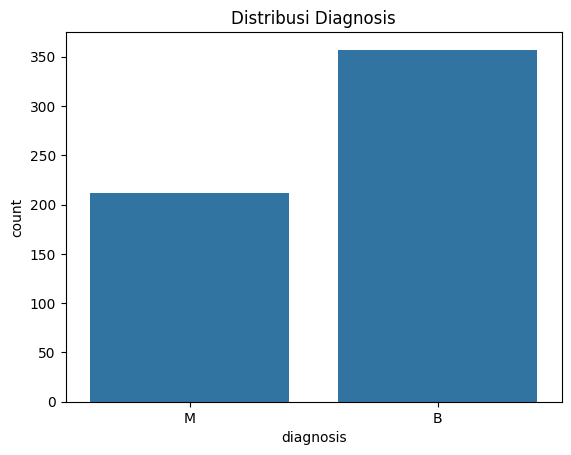

In [30]:
sns.countplot(x='diagnosis', data=df)
plt.title("Distribusi Diagnosis")
plt.show()

countplot → menampilkan grafik batang perbandingan jumlah data kanker ganas vs jinak.

In [31]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

Kolom diagnosis awalnya berisi huruf M dan B.

Model Machine Learning butuh nilai numerik → kita ubah:

M → 1 (kanker ganas)

B → 0 (kanker jinak)

In [32]:
X = df.drop(columns=['diagnosis'])  # fitur
y = df['diagnosis']                 # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X berisi semua kolom kecuali diagnosis (fitur input).

y hanya kolom diagnosis (label yang akan diprediksi).

train_test_split membagi data menjadi:
*   80% data training (X_train, y_train)
*   20% data testing (X_test, y_test)

stratify=y → memastikan proporsi kelas 0 dan 1 di train & test seimbang.



In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


*   StandardScaler mengubah setiap fitur sehingga:
    rata-rata (mean) = 0
    standar deviasi (std) = 1
*   fit_transform dilatih di data training, kemudian diterapkan.
*   Ltransform di data testing menggunakan parameter scaler yang sama.
*   Ini penting untuk Gaussian Naive Bayes karena model mengasumsikan distribusi data normal (Gaussian) dan sensitif terhadap skala fitur.





In [34]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()



*   GaussianNB() membuat objek model Naive Bayes dengan asumsi distribusi Gaussian.
*   fit() melatih model menggunakan fitur training yang sudah discale (X_train_scaled) dan label (y_train).



In [35]:
y_pred = nb.predict(X_test_scaled)

print("--- ACCURACY ---")
print("Training Accuracy :", nb.score(X_train_scaled, y_train))
print("Testing Accuracy  :", nb.score(X_test_scaled, y_test))

--- ACCURACY ---
Training Accuracy : 0.945054945054945
Testing Accuracy  : 0.9210526315789473


predict() menghasilkan label prediksi untuk data testing.
score() untuk klasifikasi sama dengan accuracy_score, jadi:

    *   Training Accuracy → seberapa baik model pada data latih.
    *   Testing Accuracy → seberapa baik model pada data uji (ini yang utama).












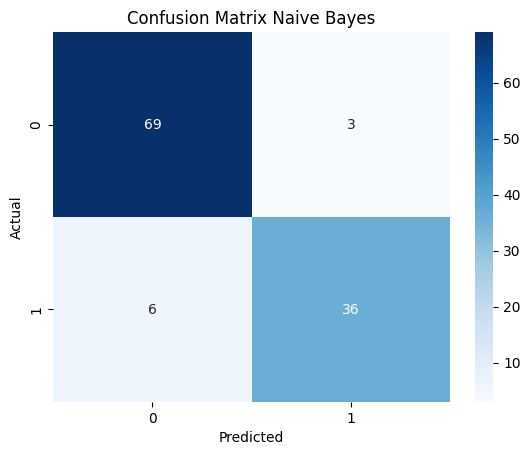

In [36]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

confusion_matrix menghitung:
*   True Negative (TN), False Positive (FP),
*   False Negative (FN), True Positive (TP).

heatmap membantu melihat jumlah prediksi benar/salah secara visual.

In [37]:
print("--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Menampilkan metrik:
*   Precision: ketepatan prediksi positif.
*   Recall: seberapa banyak positif yang berhasil ditangkap.
*   F1-score: rata-rata harmonik precision & recall.
*   Support: jumlah data tiap kelas di testing.

In [40]:
scores = cross_val_score(nb, X, y, cv=5)

print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Std Dev:", scores.std())

Cross Validation Scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Mean Accuracy: 0.9385188635305075
Std Dev: 0.014585994424363306


cross_val_score membagi data menjadi 5 fold (K=5).

Model dilatih dan diuji 5 kali pada kombinasi data yang berbeda.

scores → akurasi di setiap fold.

mean() dan std() → rata-rata akurasi dan standar deviasi (stabilitas model).